<img src="https://www.th-ab.de/typo3conf/ext/th_ab/Resources/Public/assets/logo-th-ab.svg" alt="TH-AB Logo" width="200"/>

Prof. Dr. Möckel, Prof. Dr. Radke

Maschinelles Lernen Schwerpunkt Data Science<br>
SoSe 2023

# Vorlesung 2: Erweiterte Python Programmierung

## Funktionen

Eine Funktion wird bezeichnet durch das Keyword `def`, einen Funktionsnamen, eine Argumentliste, einen Doppelpunkt und eine Einrückung des Funktionskörpers. Der Rückgabewert folgt auf das Keyword `return`.

Eine eindeutige Typenzuweisung kann mit Angabe des Datentyps mittels Strong Typing festgelegt werden. `: TYP` legt den Typ eines Funktionssarguments fest, `-> TYP` legt den Rückgabetyp fest. Python erfordert zwar keine eindeutige Typenangabe, aber es vermeidet unnötige Fehler. Es können auch Listen oder Dictionaries als Parameter oder Rückgabewerte in Funktionen verwendet werden.

In [10]:
# function using strong typing
def quad(x: int) -> int:
    return x**2

quad(3)

9

In Funktionsargumenten kann auch ein Standardwert durch Zuweisung festgelegt werden:

In [11]:
def pot(x: int, n: int = 2) -> int:
    return x**n

pot(3)

9

Minimale Funktionen können auch als anonyme Funktionen (=Lambdas) definiert werden:

In [12]:
quad = lambda x : x**2
print(quad(2))

4


In [13]:
pod = lambda x, n : x**n
print(pod(3, 4))

81


Mit Lambdas können generische Funktionen erstellt werden:

In [14]:
# generator function which multiplies all elements in a list
# by a given number using a lambda
def multiplier(multiplier):
    return lambda k : [multiplier*entry for entry in k]

# create lambdas
times3 = multiplier(3)
times10 = multiplier(10)

print(times3([2, 4, 6]))
print(times10([2, 4, 6]))

[6, 12, 18]
[20, 40, 60]


## Objektorientierte Programmierung in Python

Klassen sind grundlegende Konstrukte um Daten in einer objektorientierten Art und Weise zu gestalten. Mit Klassen lassen sich Daten und Funktionen kapseln und gruppieren. 

Das folgende Beispiel verdeutlicht, weshalb die Datenkapselung notwendig ist und die Daten deshalb in einer Klasse strukturiert sind. In diesem Beispiel sollen für die Variablen der Klasse nur bestimmte Werte zulässig sein und ein Wertepaar als eine Art semantische Einheit (Uhrzeit) bilden.

```
Private:   __method(self), __variable
Protected: _method(self), _variable
Public:    method(self), variable

Special Python methods: 

constructor: __init__(self)
human readable object representation: __str__(self)
close-as-code representation how the object was created: __repr__(self)
html representation: _repr_html_(self)
```

In [15]:
# concept of a time without seconds
class Simple_time():
    # default constructor
    def __init__(self):
        self.__hour = 0
        self.__minute = 0

    # overloaded constructor
    # args with strong typing and default value None
    def __init__(self, hour: int = 0, minute: int = 0):
        self.__check_hour(hour)
        self._check_minute(minute)
        self.__hour = hour
        self.__minute = minute

    # private method hour sanity check
    def __check_hour(self, hour: int):
        if (hour not in range(0, 23)):
            raise ValueError("Ungültiger Wert für Stunde")

    # protected method minute sanity check
    # NOTE should be private, but this is an example
    def _check_minute(self, minute: int):
        if (minute not in range(0, 59)):
            raise ValueError("Ungültiger Wert für Minute")

    # use of a decorator (a getter for self.__hour)
    @property
    def hour(self):
        return self.__hour

    # a setter for the decorator 'hour'
    @hour.setter
    def hour(self, hour):
        self.__check_hour(hour)
        self._hour = hour

    # use of a decorator (a getter for self.__minute)
    @property
    def minute(self):
        return self.__minute

    # a setter for the decorator 'minute'
    @minute.setter
    def minute(self, minute):
        self._check_minute(minute)
        self.__minute = minute

    # generate human readable representation with str() function
    def __str__(self):
        return "The time is " + str(self.hour) + ":" + str(self.minute)
    
    # generate semantic representation with repr() function
    def __repr__(self):
        return "SimpleTime(" + str(self.hour) + ", " + str(self.minute) + ")"

## Zusammenfassung und Beispiele

Im Vergleich zu anderen Programmiersprachen wie z.B. C++ werden Zugriffsbeschränkungen (Access Modifier) wie *public*, *protected* und *private* in Python nicht absolut umgesetzt. Zwar prüft Python Zugriffe auf geschützte Bereiche eines Objects, aber dieser Schutz lässt sich umgehen. Allerdings gibt es dennoch Unterschiede im Detail die auf dem ersten Blick verwirren können. Aus diesem Grund ist es sinvoller die Zugriffsbeschränkung nicht zu umgehen.

TODO Unterschied zu C++ (keine wirklichen priv/prot/ Attr. und Funk., hervorhegen das diese Keywords nur formal aber nicht Enforced sind) + Beispiel
TODO Erklärung warum es kein Enforcement gibt und was das bedeutet.

### Beispiel: Access Modifier

In [16]:
# create a new object Simple_time
device_time = Simple_time(11, 30)

try:
    # access to private member will fail
    device_time.__hour
except AttributeError:
    print("Access to private member denied")

# show object id () 
# bypass access protection to private member (don't!)
print(f"object id __hour (real private): {id(device_time._Simple_time__hour)}")

# NOT modifying private member - create a new instance exclusive to the particular object (don't)
# reason: protect private member
# __hour becomes a public member for the specific object instance!
device_time.__hour = 40

# show object id
# direct acces to __hour works now (because it becomes a public member)
print(f"object id __hour (fake private): {id(device_time.__hour)}")

# again, NO access to private member, access to the new created member (which became public)
device_time.__hour

# REAL access to private member (don't do, bad practice!)
print(device_time._Simple_time__hour)
device_time._Simple_time__hour = 100

# access to class object variables via properties
print("SimpleTime:", device_time.hour, device_time.minute)

Access to private member denied
object id __hour (real private): 140713280969464
object id __hour (fake private): 140713280970392
11
SimpleTime: 100 30


### Beispiel: Good practice

In [17]:
# create a new object Simple_time
device_time = Simple_time(11, 30)

# modify class object variables via property setters
device_time.hour = 14
device_time.minute = 45

# get string output via __str__()
print(device_time)

# get close-as-code representation via __repr__()
print(repr(device_time))

The time is 11:45
SimpleTime(11, 45)


### Klassen und Vererbung

Durch Vererbung lassen sich Hierarchien bilden, die sich gemeinsame Eigenschaften wie Datenstrukturen oder Funktionen teilen.

In [18]:
# derived class which inherits from Simple_time
class Formatted_time(Simple_time):
    def __init__(self, hour: int, minute: int):
        # call base function init (won't happen automatically!)
        super().__init__(hour, minute)

    def to_time(self) -> str:
        return str(self.hour) + ":" + str(self.minute)

In [19]:
ftime = Formatted_time(12, 30)

# call function from base class
print(ftime.hour)

# human readable __str__()
print(f"human readable: {ftime}")

# close-as-code __repr__()
print(f"close-as-code: {repr(ftime)}")

# call function from derived class
print(f"member function: {ftime.to_time()}")

12
human readable: The time is 12:30
close-as-code: SimpleTime(12, 30)
member function: 12:30


## Exceptions

Exceptions können für die Behandlung von Fehlern während der Laufzeit eines Programms genutzt werden. Eine Exception ist wie ein Brief. Sie wird an der Stelle ausgelöst an der ein Fehler auftritt und so lange weitergereicht, bis die Exception abgefangen und der Fehler sinnvoll behandelt wird. 

Hierbei ist folgende Faustregel hilfreich: Ein Fehler sollte erst dann behandelt werden, wenn die Anwendung sinnvoll darauf reagieren kann. Oftmals ist eine Fehlerbehandlung an exakt der Stelle, an der ein Fehler auftritt, nicht sinnvoll oder gar möglich. Die letzte Instanz ist der Python-Interpreter selbst, der die Anwendung abbricht, sofern eine Exception nicht vorher abgefangen wird.

Eine Übersicht an verfügbaren Exceptions findet sich hier: https://docs.python.org/3/library/exceptions.html

Beispiel einer Input/Output Exception:

TODO Beispiel einer echten Exception handling?

Ein Beispiel für Dataloading einfaches, CSV dataframe mit eigener Klasse einlesen, CSV daten enthalten korrupte daten, Setze default wert, als OOP

Kleine CSV datei mit 3-4 Zeilen, zwei Datentypen, Type mismatch

2 Verschiedene Handling strategien (default wert, fehler?)

-> Bilder laden, Pixel fixen, größen Normalisieren mit schwarzen rand, Pixel ergänzen


## Beispiel: CSV Dataset Loader

Zunächst die CSV als DataFrame:

In [20]:
import pandas as pd

# load DataFrame from csv
patients = pd.read_csv("../assets/example.csv")
patients

,Patient ID,Age,Cholesterol Level (mg/dL)
0,1,20,180
1,2,-42,40
2,3,28,-1
3,4,56,400


### Deklaration Grundlegende Klassen

In [21]:
from enum import Enum
import re

# define patient csv Enum for easier handling
class PATCSV(int):
    ID = 0
    AGE = 1
    CHOLESTEROL_LEVEL = 2

# Derive exceptions and customize
class PatientDataError(ValueError):
    def __init__(self, *args: object, cell: PATCSV) -> None:
        super().__init__(*args)
        self.cell = cell

class PatientDataEmpty(UserWarning):
    def __init__(self, *args: object, cell: PATCSV) -> None:
        super().__init__(*args)
        self.cell = cell

# Check functions for dataset data
class Semantic_check():
    @staticmethod
    def empty(value, info):
        if (value < 0):
            raise PatientDataEmpty(f"Fehlende Daten", cell=info)
        
    @staticmethod
    def negative(value, info):
        if (value < 0):
            raise PatientDataError(f"Ungültiger Wert = {value}", cell=info)

    @staticmethod
    def range(lo, hi, value, info):
        if (value < lo):
            raise PatientDataError(f"Ungültiger Bereich {value} < {lo}!", cell=info)
        
        if (value > hi):
            raise PatientDataError(f"Ungültiger Bereich {value} > {hi}!", cell=info)

# Patient representation
class Patient():
    def __init__(self, id: int, age: int, cholesterol_level: int):
        # perform post checks
        Semantic_check.negative(id, info=PATCSV.ID)
        Semantic_check.empty(age, info=PATCSV.AGE)
        Semantic_check.range(0, 120, age, info=PATCSV.AGE)
        Semantic_check.empty(cholesterol_level, info=PATCSV.CHOLESTEROL_LEVEL)
        Semantic_check.range(0, 300, cholesterol_level, info=PATCSV.CHOLESTEROL_LEVEL)

        self.__id = id
        self.__age = age
        self.__cholesterol_level = cholesterol_level
        
    # getter properties for class member variables
    @property
    def id(self): return self.__id
    @property
    def age(self): return self.__age
    @property
    def cholesterol_level(self): return self.__cholesterol_level

### Deklaration CSV Loader

In [22]:
import random
import re
from enum import Enum

# handle patients datasets
class Patients():

    # constructor
    def __init__(self):
        # stores the header (column names)
        self.__header = []
        # stores the data
        self.__datasets = []

    # csv loader
    def load_csv(self, file_name: str):
        # open file in read mode (UTF-8)
        with open(file_name, encoding="UTF8", mode="r") as file:
            # first line in csv is the header
            read_header = True

            # read line by line
            for line in file:

                # use regexp to match all data separated by comma (remove leading and trailing whitespace)
                data = re.findall(r"([^,]+)", line.strip())

                # read header from the first line in csv
                if (read_header):
                    read_header = False
                    self.__header = [
                        data[PATCSV.ID], data[PATCSV.AGE], data[PATCSV.CHOLESTEROL_LEVEL]
                    ]
                else:

                    # read data
                    try:
                        # try to assign data to patient
                        pat = Patient(
                            int(data[PATCSV.ID]), int(data[PATCSV.AGE]), int(data[PATCSV.CHOLESTEROL_LEVEL])
                        )

                        self.__datasets.append(pat)

                    # handle errors
                    except PatientDataError as err:
                        print(f"[FEHLER] {err} in index {err.cell}")
                        print("-> Korrektur durch Defaultwert")

                        data[err.cell] = 0

                        pat = Patient(
                            int(data[PATCSV.ID]), int(data[PATCSV.AGE]), int(data[PATCSV.CHOLESTEROL_LEVEL])
                        )

                        self.__datasets.append(pat)

                    # handle warnings
                    except PatientDataEmpty as warn:
                        print(f"[WARNUNG] {warn} in index {warn.cell}")
                        print("-> Korrektur durch Zufallswert")

                        # replacement values
                        match warn.cell:
                            case PATCSV.ID:
                                data[warn.cell] = random.randint(0, 9999)
                            case PATCSV.AGE:
                                data[warn.cell] = random.randint(0, 85)
                            case PATCSV.CHOLESTEROL_LEVEL:
                                data[warn.cell] = random.randint(0, 200)

                        # replace missing data with a random number
                        data[warn.cell] = random.randint(0, 85)

                        pat = Patient(
                            int(data[PATCSV.ID]), int(data[PATCSV.AGE]), int(data[PATCSV.CHOLESTEROL_LEVEL])
                        )

                        self.__datasets.append(pat)

    # string representation
    def __str__(self):
        str = ""

        # add header
        str += f"{self.__header[PATCSV.ID]},{self.__header[PATCSV.AGE]},{self.__header[PATCSV.CHOLESTEROL_LEVEL]}\n"

        # add datasets
        for ds in self.__datasets:
            str += f"{ds.id},{ds.age},{ds.cholesterol_level}\n"

        return str
    
    # html representation (for Jupyter Notebook)
    def _repr_html_(self):
        tr_style = "style='background-color: #cc3300; color: #ffffff;'"
        th_style = "style='border: 1px solid #dddddd; padding: 8px;'"
        td_style = th_style

        # make a nice table output (like pandas dataframe)
        html = "<table style='border-collapse: collapse;'>"

        # add header
        html += f"<tr {tr_style}>"

        for item in self.__header:
            html += f"<th {th_style}>{item}</th>"

        html += "</tr>"

        # add datasets
        for ds in self.__datasets:
            html += "<tr>"
            html += f"<td {td_style}>{ds.id}</td> \
                      <td {td_style}>{ds.age}</td> \
                      <td {td_style}>{ds.cholesterol_level}</td>"
            html += "</tr>"

        html += "</table>"

        return html

### Dataset laden und anzeigen

In [33]:
try:
    pat = Patients()
    pat.load_csv("../assets/example.csv")

except FileNotFoundError as err:
    print(f"[FATAL] {err}")

# print(pat)
pat

[WARNUNG] Fehlende Daten in index 1
-> Korrektur durch Zufallswert
[WARNUNG] Fehlende Daten in index 2
-> Korrektur durch Zufallswert
[FEHLER] Ungültiger Bereich 400 > 300! in index 2
-> Korrektur durch Defaultwert


Patient ID,Age,Cholesterol Level (mg/dL)
1,20,180
2,79,40
3,28,29
4,56,0


Beispiel einer Type Exception:

In [31]:
try:
    print(1 + "2")
except TypeError as ex:
    print("Types not compatible:", ex.args)

Types not compatible: ("unsupported operand type(s) for +: 'int' and 'str'",)


Beispiel Index Exception:

In [32]:
data = [1, 2, 3]

try:
    print(data[99])
except IndexError as ex:
    print("Ungültiger Index auf Liste:", ex.args)

Ungültiger Index auf Liste: ('list index out of range',)


## Arbeiten mit Bildern

### Bibliothek Pickle 

Pickle ist eine Bibliothek, um binäre Datenbestände (z.B. bitstreams) und Python-Objekte (z.B. Dictionaries) ineinander umzuwandeln. Wir nutzen diese nur naiv um Daten aus bestehenden Datensätzen zu extrahieren. Weitere Infos z.B. unter:

https://docs.python.org/3/library/pickle.html

Da Bitstreams völlig naiv in Python-Code umgesetzt werden ist es wichtig, nur Daten aus vertrauenswürdiger Quelle zu benutzen. 

##### Verkehrszeichenerkennung

Wir laden einen Datensatz von Verkehrszeichen, der zur Kalibration von Verfahren der Bilderkennung häufig genutzt wird. Dann ist dessen Datenstruktur zu verstehen.

In [26]:
import pickle

# Import pickled data as Python dictionaries
test  = pickle.load(open('../assets/verkehrszeichen.p' , mode='rb'))

print("Datenstruktur des Datensatzes train ist Dictionary mit den Keys: ")
for key in test:
   print(key)

print("Den einzelnen Keys zugeordnete Datenstrukturen: ")
print("Datenstruktur von sizes:    ", test['sizes'].shape)
print("Datenstruktur von coords:   ", test['coords'].shape)
print("Datenstruktur von features: ", test['features'].shape)
print("Datenstruktur von labels:   ", test['labels'].shape)

Datenstruktur des Datensatzes train ist Dictionary mit den Keys: 
sizes
coords
features
labels
Den einzelnen Keys zugeordnete Datenstrukturen: 
Datenstruktur von sizes:     (12630, 2)
Datenstruktur von coords:    (12630, 4)
Datenstruktur von features:  (12630, 32, 32, 3)
Datenstruktur von labels:    (12630,)


In [27]:
# Benennung der verwendeten Teile des Datensatzes:

features_test   = test['features']
labels_test     = test['labels']

n_testing  = features_test.shape

print(n_testing)

(12630, 32, 32, 3)


#### Diskussion eines Bilddatensatzes

In [28]:
# Analyse eines Bilddatensatzes (z.B. 25. Bild:)
# RGB Anteile in 3. Komponente (Zahl zwischen 0 und 255):
print("Rotanteil:")
t = test['features'][24,:,:,0]
print(t)
print("Grünanteil:")
t = test['features'][24,:,:,1]
print(t)
print("Blauanteil:")
t = test['features'][24,:,:,2]
print(t)
# Teste Plausibilität: Liegen RGB - Werte vor?
print(t.min(), t.max())

Rotanteil:
[[ 80  53  74 ...  29  23  28]
 [ 82  93 118 ...  32  19  20]
 [ 70  59  80 ...  30  18  18]
 ...
 [116 123 161 ...  42  58  50]
 [192 207 255 ...  85  54  40]
 [255 255 255 ...  78  47  62]]
Grünanteil:
[[ 44  47  53 ...  22  21  21]
 [ 55  81  76 ...  22  17  19]
 [ 54  53  63 ...  25  16  17]
 ...
 [118 113 145 ...  35  43  38]
 [175 194 252 ...  58  47  41]
 [255 255 255 ...  51  50  56]]
Blauanteil:
[[ 28  32  33 ...  15  17  14]
 [ 47  61  51 ...  11  14  17]
 [ 34  27  32 ...  18  14  16]
 ...
 [100  86 120 ...  20  26  23]
 [167 192 240 ...  42  27  25]
 [254 255 255 ...  43  36  39]]
2 255


Plotten einiger der Verkehrszeichen mit der bereits verwendeten Plotroutine:

N.B. Die Definition einer colormap (cmap) ist optional und wird bei RGB-Daten trotz anderslautender Definitionen ignoriert!
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html

<class 'numpy.ndarray'>
(32, 32, 3)


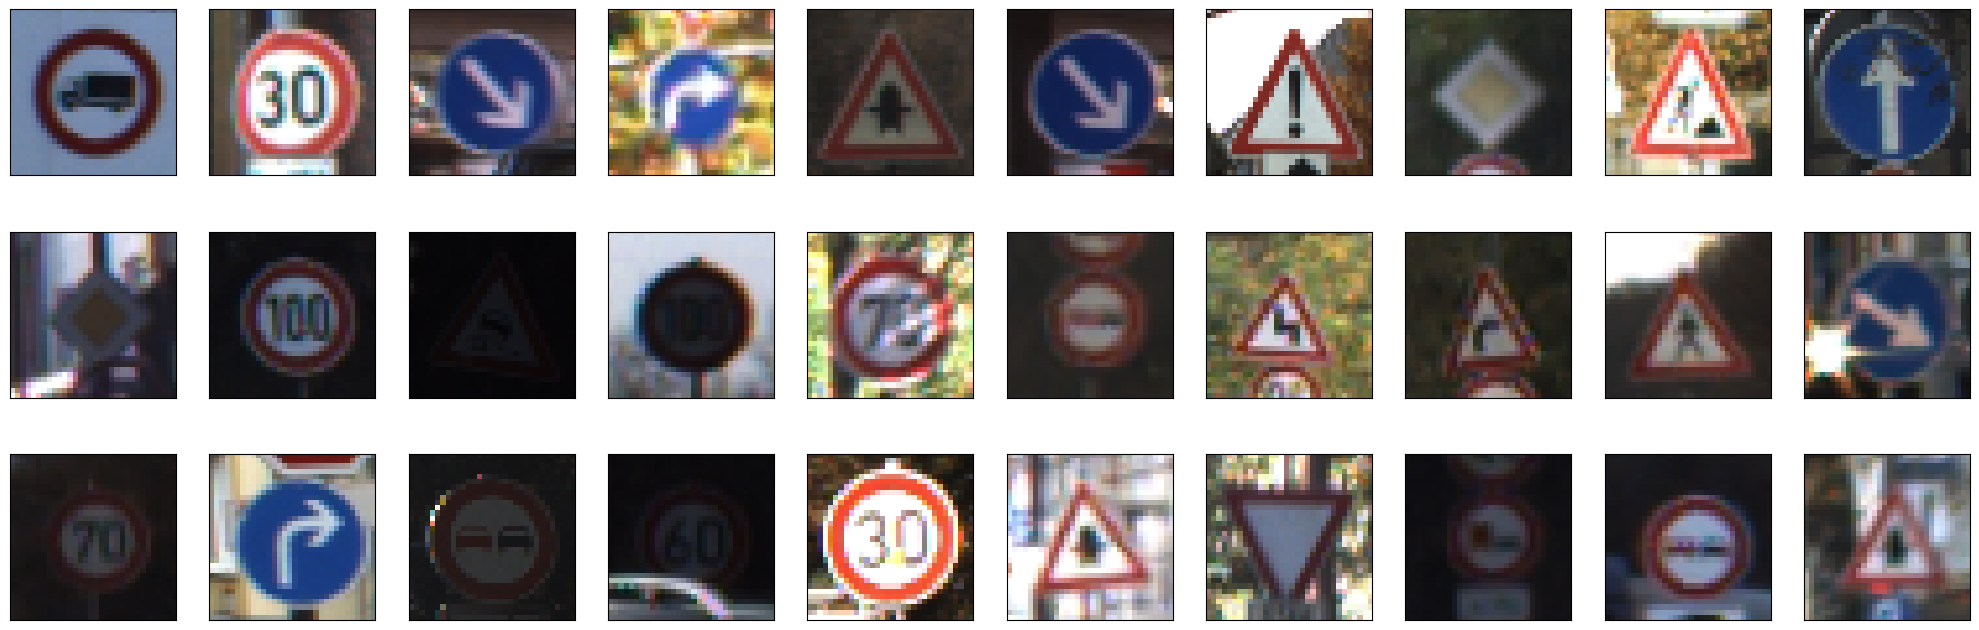

In [29]:
import matplotlib.pyplot as plt

images = test['features']
print(type(images))
print(images[1].shape)
# Ausgabe von Beispielen:
plt.figure(1, figsize=(20, 7))
plt.clf()
plt.subplots_adjust(left=.01, right=.99, bottom=.01, top=.91)
for i in range(30):
    plt.subplot(3, 10, i + 1)
    plt.imshow(images[i], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    # cmap wird ignoriert bei der Übergabe von RGB Daten
    plt.xticks(())
    plt.yticks(())
    
plt.show()

### Bibliothek csv

Die Bibliothek csv stellt Routinen zur Bearbeitung von comma seperated value (csv) Dateien zur Verfügung.

Hier werden Bezeichnungen von Verkehrszeichen aus einer csv Datei geladen und in einer Python-Liste *signs* abgelegt:

In [30]:
import csv

# Import file with class names 
signs = []
with open('signnames.csv', 'r') as csvfile:          # Öffne file als read 'r'
    signnames = csv.reader(csvfile, delimiter=',')   # Trennzeichen Komma
    print( "Signnames ist ein formales Objekt: ", type(signnames))
    next(signnames,None)
    
    # Schrittweises Auslesen der Zeilen des Files:
    for row in signnames:
        print(row)
        signs.append(row[1])
    csvfile.close()

print("ERGEBNIS DES LADENS:")
print(signs)
print("Anzahl der betrachteten unterschiedlichen Verkehrszeichen (Klassen):", len(signs))

FileNotFoundError: [Errno 2] No such file or directory: 'signnames.csv'

#### Diskussion der im Trainings-/Test-/Validierungs-Datensatz mitgelieferten Labels:

In [ ]:
print("Labels im Testdatensatz: ", labels_test)
print("Anzahl aller Labels im Testdatensatz: ", len(labels_test))
print("Wertebereich der Labels: [", labels_test.min(),",",labels_test.max(), "]")

Labels im Testdatensatz:  [16  1 38 ...  6  7 10]
Anzahl aller Labels im Testdatensatz:  12630
Wertebereich der Labels: [ 0 , 42 ]


##### Kombination von Bild- und Verkehrsschildbezeichnung:

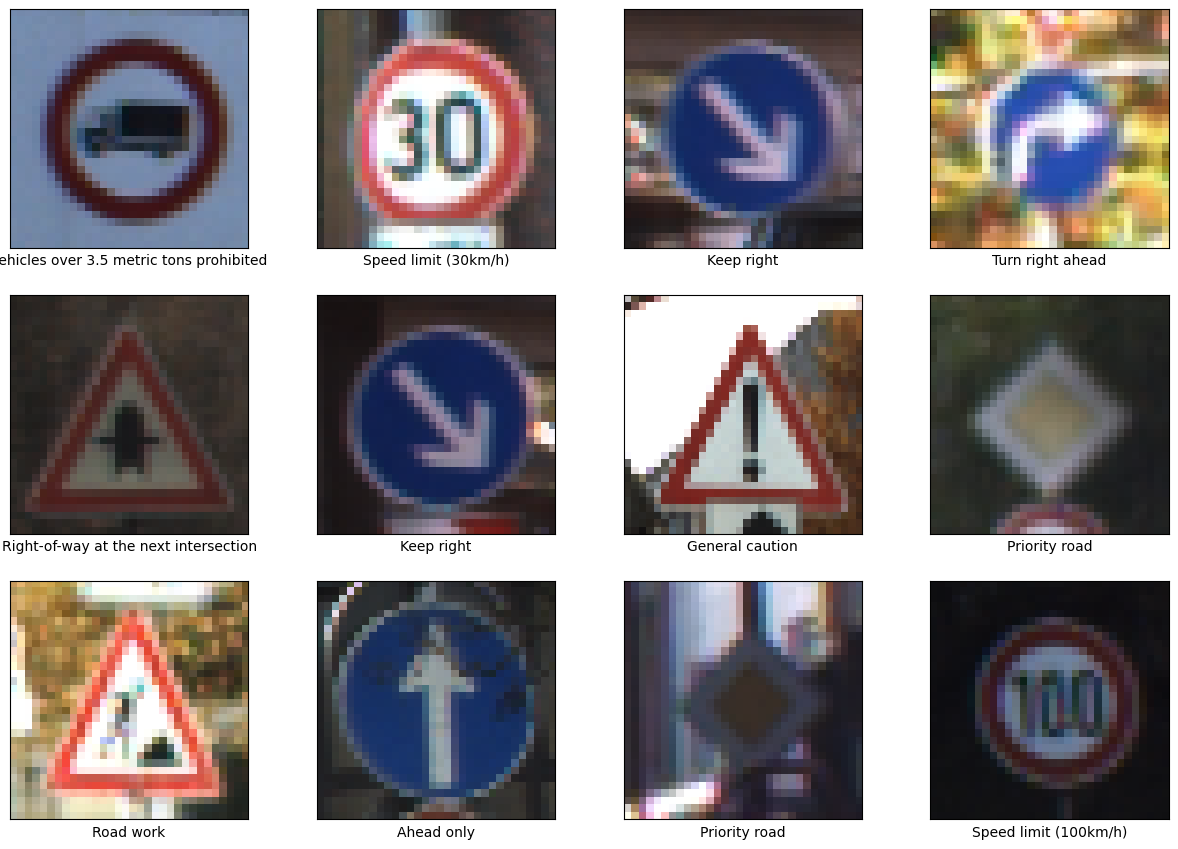

In [ ]:
# Ausgabe von Beispielen mit Labels:
plt.figure(1, figsize=(12, 9))
plt.clf()
plt.subplots_adjust(left=.01, right=.99, bottom=.01, top=.91)
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    # cmap wird ignoriert bei der Übergabe von RGB Daten
    plt.xlabel(signs[labels_test[i]])
    plt.xticks(())
    plt.yticks(())
    
plt.show()